# <font color="darkblue"> Prática 02: Algoritmo k-NN </font>

**Objetivos:**


*   Aplicar o algoritmo k-NN a um problema prático.
*   Apresentar as funções do Scikit-Learn que lidam com o k-NN.



**Descrição:**

Implemente duas versões de um classificador que usa o algoritmo k-NN para identificar dígitos escritos à mão a partir de um conjunto de imagens e compare os tempoa de execução. Na primeira versão, você deverá implementar o algoritmo k-NN conforme visto em sala de aula. Na segunda, você deverá usar a algoritmo k-NN da biblioteca Scikit-Learn. O conjunto de imagens a ser utilizado consiste no dataset <i> Digits </i> da biblioteca Scikit-Learn. 

# <font color="darkblue"> Solução </font>

### Descrição do Dataset

In [ ]:
#%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time as time
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

digits = load_digits()
print(digits.DESCR)

### Exploração do Dataset

In [ ]:
print(digits.target[12])
print(digits.data.shape)
print(type(digits.data))
print(digits.images[10])

### Exibição das imagens

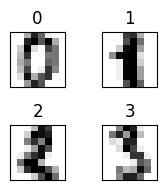

In [13]:
figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(2, 2))

for item in zip(axes.ravel(), digits.images, digits.target):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([]) 
    axes.set_yticks([])  
    axes.set_title(target)
    
# usado para um numero nao ficar em cima do outro        
plt.tight_layout() 

### Implementação da Versão 1 do classificador
Divida os dados em dois conjuntos, de treino e teste, implemente o Algoritmo k-NN conforme discutido em sala de aula e exiba a acurácia da classificação e o tempo de execução.

In [16]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.5, random_state=42)

def calculate_euclidean_distance(a,b):
    return np.sqrt(np.sum((a-b)**2))

def find_knn(x_train, y_train, x_test, k=3):
    y_pred = []
    for test in x_test:
        distances = [calculate_euclidean_distance(test, x) for x in x_train]
        sorted_indices = np.argsort(distances)
        k_nearest_labels = [y_train[i] for i in sorted_indices[:k]]
        most_common = np.bincount(k_nearest_labels).argmax()
        y_pred.append(most_common)
    return np.array(y_pred)

start_time = time.time()
y_predict_manually = find_knn(x_train, y_train, x_test, k=3)
end_time = time.time()

accuracy_manual = np.mean(y_predict_manually == y_test)

print(f"Manual accuracy = {accuracy_manual *100:.2f}%")
print(f"Execution time manually = {end_time - start_time:.4f} seconds.")

Manual accuracy = 98.67%
Execution time manually = 4.7963 seconds.


### Implementação da Versão 2 do classificador
Utilize a função train_test_split() da bibioteca Scikit-Learn para separar os dados em treino e teste e o classificador k-NN da própria biblioteca para identificação dos dígitos. Ao final, exiba a classificação e o tempo de execução.

In [17]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.5, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
start_time = time.time()
knn.fit(x_train, y_train)

y_pred_sklearn = knn.predict(x_test)
end_time = time.time()

accuracy_sklearn = np.mean(y_pred_sklearn == y_test)
print(f"The accuracy of the scikit-learn: {accuracy_sklearn *100:.2f}%")
print(f"Scikit-learn's execution time: {end_time - start_time:.4f} seconds.")

The accuracy of the scikit-learn: 98.67%
Scikit-learn's execution time: 0.3671 seconds.
